# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#1
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.64e-20
Time:                        15:20:58   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#2
y, X = patsy.dmatrices('tip ~ net_bill', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        15:20:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res'>

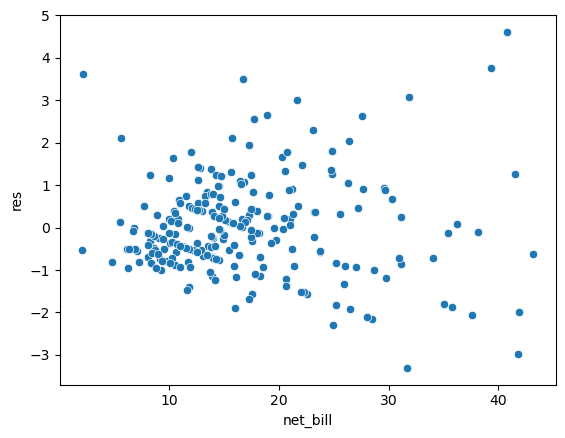

In [6]:
#3
tips['res'] = reg.resid
sns.scatterplot(y = 'res', x = 'net_bill', data=tips)

In [7]:
#4
#regressao com log do net_bill
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           4.40e-20
Time:                        15:20:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res'>

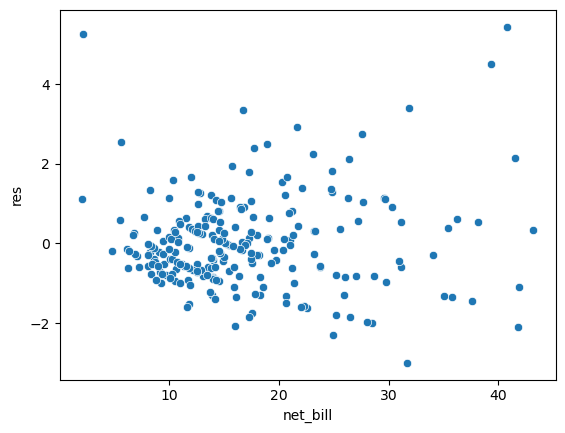

In [8]:
tips['res'] = reg.resid
sns.scatterplot(y = 'res', x = 'net_bill', data=tips)

In [9]:
#regressao com transformacao do net bill em polinomio
y, X = patsy.dmatrices('tip ~ I(net_bill + np.power(net_bill, 2))', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.22e-20
Time:                        15:20:58   Log-Likelihood:                -381.12
No. Observations:                 244   AIC:                             766.2
Df Residuals:                     242   BIC:                             773.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.2360      0.105     21.267      0.000       2.029       2.443
I(net_bill + np.power(net_bill, 2))     0.0021      0.000     10.228      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.881   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.771
Skew:                           0.621   Prob(JB):                     1.26e-07
Kurtosis:                       4.258   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res'>

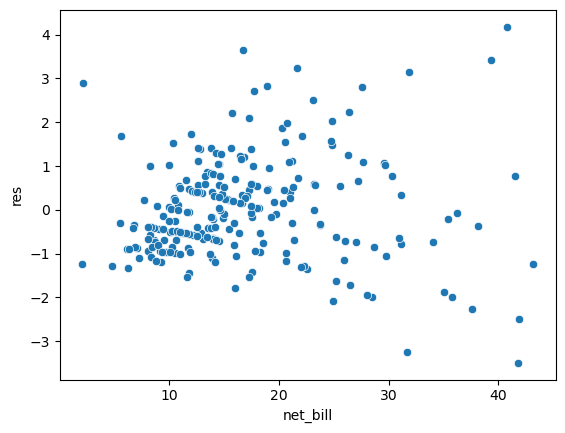

In [10]:
tips['res'] = reg.resid
sns.scatterplot(y = 'res', x = 'net_bill', data=tips)

In [11]:
# modelo com polinomio ficou ligeiramente melhor

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [12]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [13]:
#1
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.21e-18
Time:                        15:20:58   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#2
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.60e-21
Time:                        15:20:58   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res_log'>

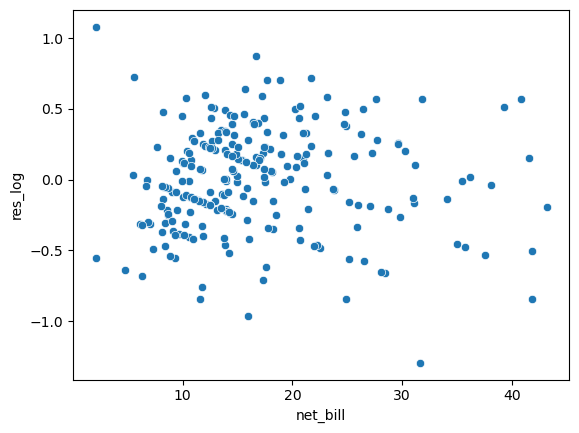

In [15]:
#3
tips['res_log'] = reg.resid
sns.scatterplot(y = 'res_log', x = 'net_bill', data=tips)

In [16]:
#4
#regressao com log do net_bill
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.62e-22
Time:                        15:20:58   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res_log'>

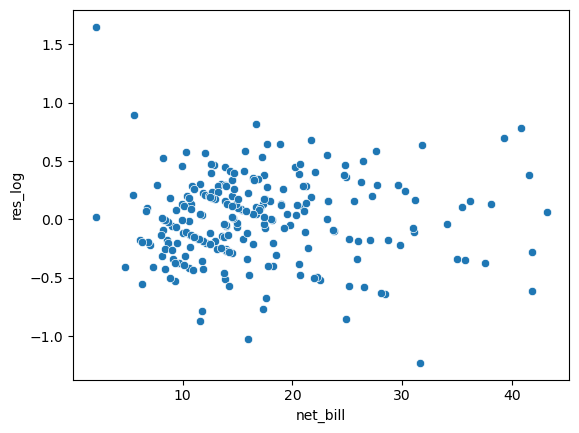

In [17]:
tips['res_log'] = reg.resid
sns.scatterplot(y = 'res_log', x = 'net_bill', data=tips)

In [18]:
#regressao com transformacao do net bill em polinomio
y, X = patsy.dmatrices('np.log(tip) ~ I(net_bill + np.power(net_bill, 2))', data=tips)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     81.37
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.92e-17
Time:                        15:20:58   Log-Likelihood:                -107.90
No. Observations:                 244   AIC:                             219.8
Df Residuals:                     242   BIC:                             226.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7831      0.034     22.823      0.000       0.716       0.851
I(net_bill + np.power(net_bill, 2))     0.0006    6.7e-05      9.020      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.460   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.493
Skew:                          -0.240   Prob(JB):                        0.288
Kurtosis:                       2.880   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='res_log'>

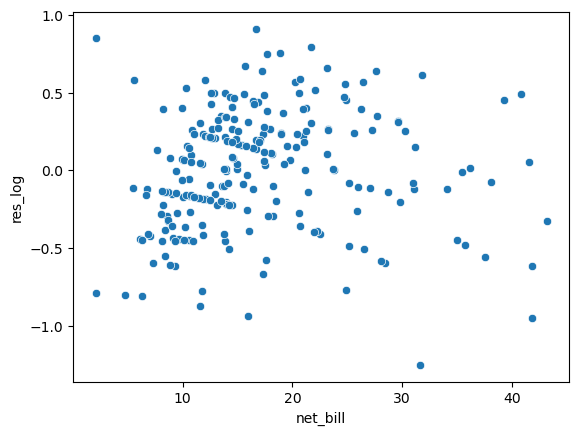

In [19]:
tips['res_log'] = reg.resid
sns.scatterplot(y = 'res_log', x = 'net_bill', data=tips)

In [20]:
# o modelo do item 1 (transformando X em polinomio) tem R2 com 0.302.
# ja no "melhor" modelo do item 2 (log de y e de X) tem R2 com 0.319.
# Mas ha de se considerar que o modelo com log em y e polinomio em X teve residuos muito menores. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [21]:
#1
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [22]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [23]:
df.isna().sum()

data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [24]:
df = df.dropna()

In [25]:
y, X = patsy.dmatrices('renda ~ tempo_emprego', data=df)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:20:58   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tempo_emprego', ylabel='res'>

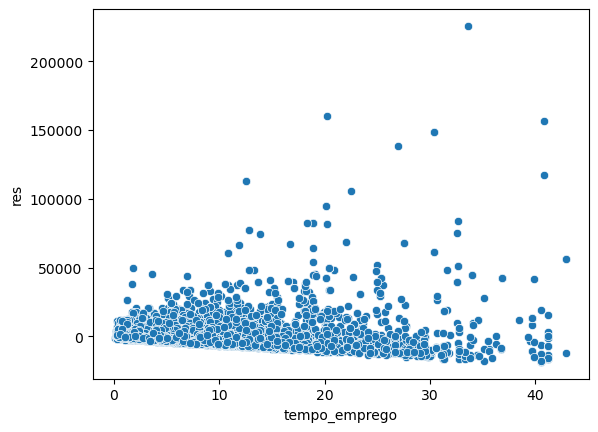

In [26]:
#2
df['res'] = reg.resid
sns.scatterplot(y = 'res', x = 'tempo_emprego', data=df)

In [27]:
#primeiro tentaria dropar esses outliers, depois aproximaria com log

In [28]:
#3
y, X = patsy.dmatrices('renda ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12387   BIC:                         2.579e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5759.2442   2520.039     -2.285      0.022   -1.07e+04    -819.575
data_ref[T.2015-02-01]             -51.9151    377.096     -0.138      0.891    -791.082     687.252
data_ref[T.2015-03-01]             222.9354    378.084      0.590      0.555    -518.168     964.039
data_ref[T.2015-04-01]             642.3659    376.953      1.704      0.088     -96.520    1381.252
data_ref[T.2015-05-01]             176.5809    375.914      0.470      0.639    -560.270     913.432
data_ref[T.2015-06-01]             642.6161    377.479      1.702      0.089     -97.302    1382.534
data_ref[T.2015-07-01]             366.5612    376.191      0.974      0.330    -370.831    1103.954
data_ref[T.2015-08-01]             207.0676    377.492      0.549      0.583    -532.875     947.010
data_ref[T.2015-09-01]             150.6806    374.958      0.402      0.688    -584.296     885.657
data_ref[T.2015-10-01]             272.5373    377.511      0.722      0.470    -467.442    1012.517
data_ref[T.2015-11-01]             444.1329    377.686      1.176      0.240    -296.190    1184.455
data_ref[T.2015-12-01]             624.4096    378.999      1.648      0.099    -118.488    1367.307
data_ref[T.2016-01-01]             302.4136    377.447      0.801      0.423    -437.441    1042.268
data_ref[T.2016-02-01]             -43.5417    377.367     -0.115      0.908    -783.239     696.155
data_ref[T.2016-03-01]              60.1761    380.722      0.158      0.874    -686.098     806.450
sexo[T.M]                         6056.3382    155.940     38.838      0.000    5750.672    6362.005
posse_de_veiculo[T.True]            42.9217    150.594      0.285      0.776    -252.267     338.110
posse_de_imovel[T.True]            352.5163    149.455      2.359      0.018      59.561     645.472
tipo_renda[T.Bolsista]           -1377.8362   2568.569     -0.536      0.592   -6412.631    3656.958
tipo_renda[T.Empresário]           828.6254    158.916      5.214      0.000     517.125    1140.126
tipo_renda[T.Pensionista]        -2632.1209   2569.530     -1.024      0.306   -7668.798    2404.557
tipo_renda[T.Servidor público]     138.3702    236.531      0.585      0.559    -325.267     602.007
educacao[T.Pós graduação]         1010.8977   1691.642      0.598      0.550   -2304.984    4326.780
educacao[T.Secundário]             560.1259    766.269      0.731      0.465    -941.881    2062.133
educacao[T.Superior completo]     1177.9727    769.202      1.531      0.126    -329.783    2685.729
educacao[T.Superior incompleto]    150.1649    828.061      0.181      0.856   -1472.963    1773.293
estado_civil[T.Separado]          1150.7179   1183.904      0.972      0.331   -1169.919    3471.354
estado_civil[T.Solteiro]           817.3819   1158.94

In [29]:
#4
y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego', data=df)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:20:59   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2790      0.031    233.591      0.000       7.218       7.340
sexo[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
posse_de_imovel[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
idade                       0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego               0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tempo_emprego', ylabel='res'>

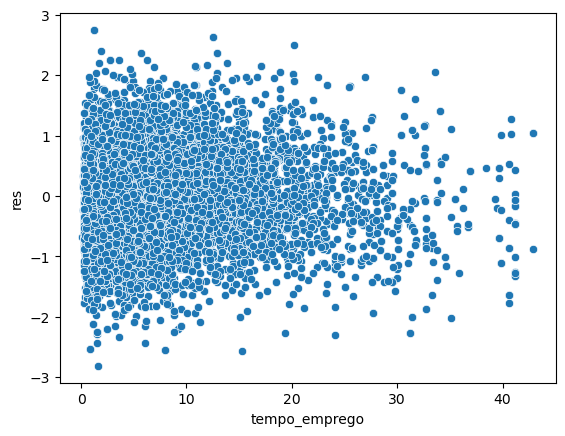

In [30]:
#5
df['res'] = reg.resid
sns.scatterplot(y = 'res', x = 'tempo_emprego', data=df)

In [31]:
# retirando algumas variaveis e fazendo em funcao do log da renda o valor de R2 melhorou significativamente